## 计算混淆矩阵
`re_label.txt`和`pr_label.txt`这两个文件分别代表了你样本的真实label和预测label，然后读到y_true和y_pred这两个变量中计算后面的混淆矩阵。当然，不一定非要使用这种txt格式的文件读入的方式，只要你最后将你的真实
label和预测label分别保存到y_true和y_pred这两个变量中即可。

myNet2的混淆矩阵，观察可知`dungong`和`huayin`两种容易混淆。

In [28]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels表示你不同类别的代号，比如这里的demo中有13个类别
# labels = ["chanyin","huayin","dungong","others"]
# labels = ["detache","diangong","harmonic","legato&slide&glissando","percussive","pizzicato","ricochet","staccato","tremolo","trill","vibrato"]
# labels = ['FT', 'Tremolo', 'Trill', 'Vibrato']
labels = ['FT', 'Tremolo', 'Trill', 'Vibrato', 'Acciacatura', 'Portamento', 'Glissando']
'''
具体解释一下re_label.txt和pr_label.txt这两个文件，比如你有100个样本
去做预测，这100个样本中一共有10类，那么首先这100个样本的真实label你一定
是知道的，一共有10个类别，用[0,9]表示，则re_label.txt文件中应该有100
个数字，第n个数字代表的是第n个样本的真实label（100个样本自然就有100个
数字）。
同理，pr_label.txt里面也应该有1--个数字，第n个数字代表的是第n个样本经过
你训练好的网络预测出来的预测label。
'''
y_true = np.loadtxt('./confusion_matrix/real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/pred_label.txt')

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def compute_cm(y_true, y_pred, res_name):
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
    print(cm_normalized)
    '''
    for latex purposes:
    '''
    cm = np.around(cm_normalized*100, decimals = 1)
    for i, rows in enumerate(cm):
        print(labels[i])
        for item in rows:
            print("&", item)
            
    #理论上只要这步就行了，后面的矩阵方便看。
    plt.figure(figsize=(12, 8), dpi=120)

    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)

    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm_normalized[y_val][x_val]
        if c > 0.01:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
    # offset the tick
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
    # show confusion matrix
    plt.savefig('./confusion_matrix/'+res_name+'_confusion_matrix.png', format='png')
    plt.show()

[[7.60e-01 1.26e-03 3.27e-03 1.59e-01 9.19e-04 2.69e-03 2.38e-03 3.23e-03
  1.14e-02 5.00e-02 6.09e-03]
 [7.22e-03 6.78e-01 5.41e-02 1.59e-01 1.78e-03 3.31e-03 1.31e-02 2.54e-02
  1.08e-02 2.74e-02 1.96e-02]
 [5.84e-01 1.50e-03 6.72e-03 1.04e-01 2.45e-03 6.80e-03 4.90e-03 5.69e-03
  2.45e-02 2.31e-01 2.87e-02]
 [2.30e-02 1.13e-02 3.76e-03 8.31e-01 2.19e-03 8.08e-03 3.61e-02 1.17e-02
  3.06e-02 3.61e-02 5.99e-03]
 [2.91e-03 7.98e-03 7.51e-04 4.50e-02 2.77e-01 1.01e-01 6.93e-02 3.05e-02
  4.49e-01 1.48e-02 1.88e-03]
 [1.25e-02 1.30e-02 0.00e+00 8.27e-02 7.95e-02 3.66e-01 3.01e-01 2.46e-02
  9.94e-02 1.49e-02 6.51e-03]
 [4.47e-03 1.00e-02 1.42e-03 7.14e-02 6.07e-02 6.83e-02 5.62e-01 1.05e-01
  1.00e-01 1.13e-02 5.13e-03]
 [1.40e-02 2.07e-02 1.20e-03 6.88e-02 8.13e-02 4.78e-02 3.13e-01 3.38e-01
  8.47e-02 2.07e-02 9.74e-03]
 [1.58e-03 2.50e-03 4.35e-04 1.22e-02 1.17e-02 9.25e-03 6.75e-03 3.05e-03
  9.32e-01 1.89e-02 1.74e-03]
 [1.12e-02 1.27e-02 5.39e-03 1.66e-01 2.67e-03 8.46e-03 8.54e-03

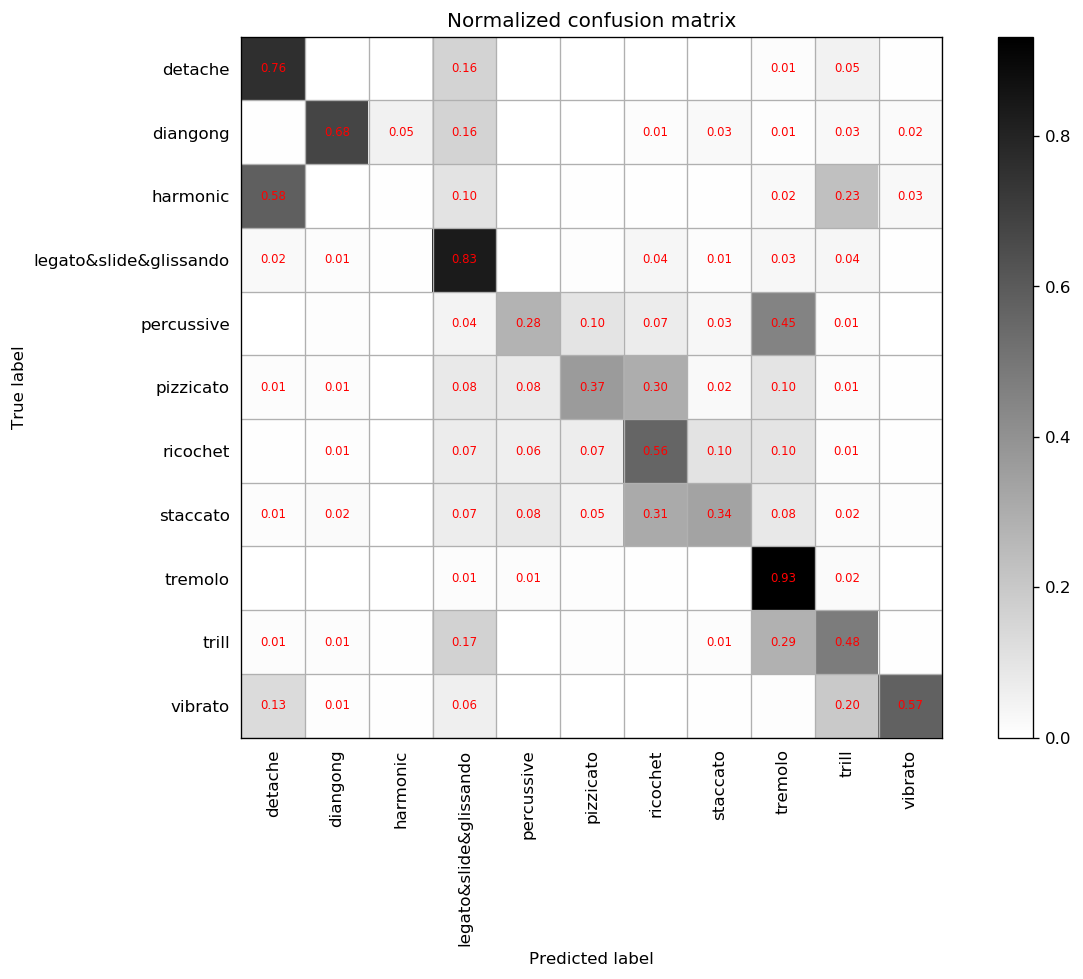

In [13]:
y_true = np.loadtxt('./confusion_matrix/fcn_mel_11class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/fcn_mel_11class_pred_label.txt')
compute_cm(y_true, y_pred, 'fcn_mel_11class')

[[7.09e-01 7.32e-03 3.68e-03 1.72e-01 1.77e-03 3.47e-03 3.57e-03 8.34e-03
  7.79e-03 2.68e-02 5.64e-02]
 [8.05e-02 5.94e-01 2.69e-02 1.36e-01 3.05e-02 2.06e-02 5.95e-03 1.36e-02
  1.82e-02 6.65e-02 6.63e-03]
 [6.58e-01 5.37e-03 1.22e-02 6.65e-02 3.87e-03 5.37e-03 4.43e-03 1.80e-02
  1.79e-02 8.48e-02 1.24e-01]
 [1.32e-01 2.29e-02 3.19e-03 6.37e-01 5.77e-03 5.97e-02 1.29e-02 4.57e-02
  3.48e-02 3.64e-02 9.75e-03]
 [7.51e-03 3.86e-02 1.88e-04 5.62e-02 2.82e-01 4.27e-02 3.71e-02 5.63e-02
  4.00e-01 7.72e-02 2.63e-03]
 [1.72e-02 5.95e-02 1.86e-03 4.88e-02 9.15e-02 2.54e-01 1.74e-01 1.68e-01
  1.30e-01 4.28e-02 1.35e-02]
 [7.74e-03 1.00e-02 5.45e-04 4.12e-02 1.55e-02 6.95e-02 5.54e-01 1.83e-01
  8.63e-02 2.58e-02 6.76e-03]
 [1.98e-02 1.96e-02 1.88e-03 6.15e-02 2.03e-02 1.05e-01 2.81e-01 3.40e-01
  1.10e-01 3.42e-02 8.20e-03]
 [2.45e-03 1.47e-03 2.72e-04 5.22e-03 9.09e-03 4.79e-03 3.05e-03 6.86e-03
  8.99e-01 6.36e-02 4.24e-03]
 [7.51e-03 2.43e-02 1.61e-03 9.03e-02 7.71e-03 1.51e-02 6.37e-03

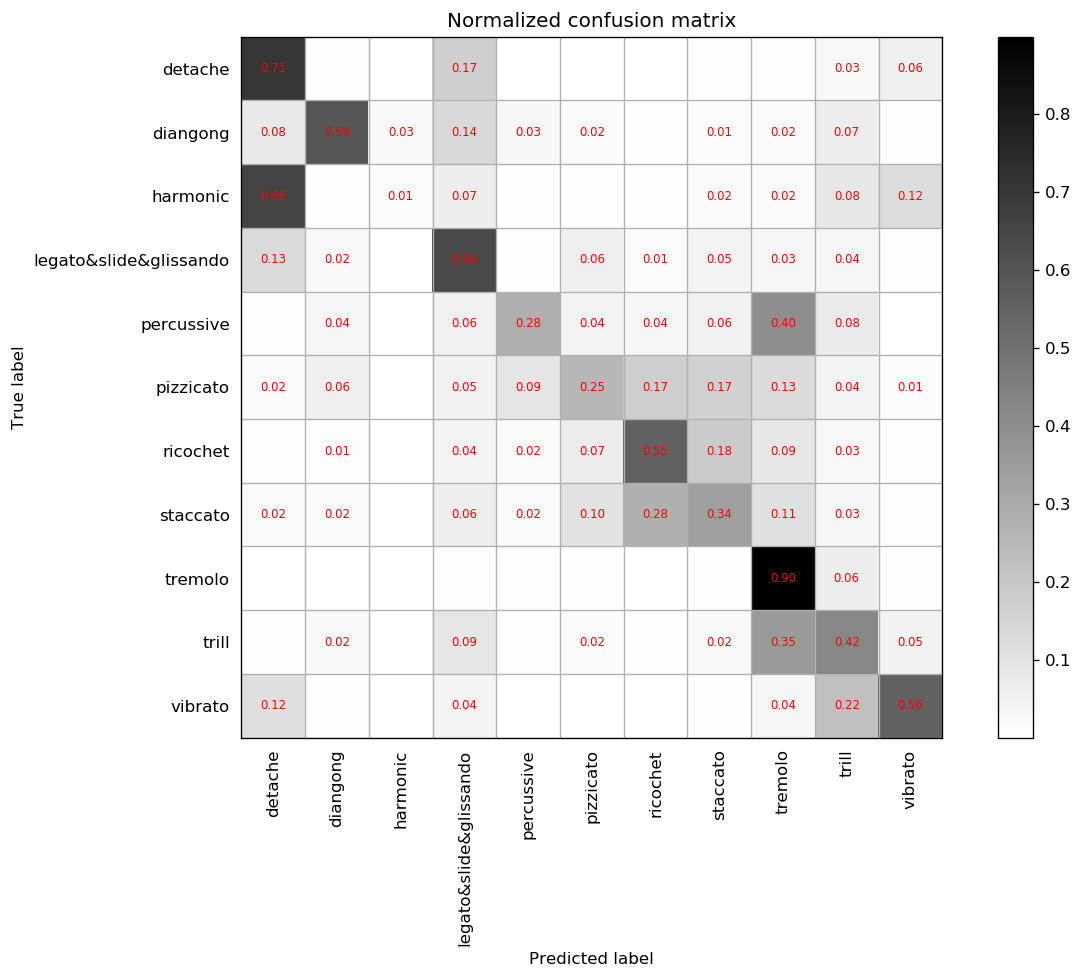

In [12]:
y_true = np.loadtxt('./confusion_matrix/fcn_cqt_11class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/fcn_cqt_11class_pred_label.txt')
compute_cm(y_true, y_pred, 'fcn_cqt_11class')

[[8.83e-01 6.37e-03 1.80e-03 2.00e-02 6.81e-04 5.28e-03 9.87e-04 1.04e-02
  3.68e-03 6.14e-02 6.06e-03]
 [8.02e-02 2.48e-01 5.80e-02 2.89e-01 6.71e-03 1.61e-02 7.56e-03 4.07e-02
  7.90e-03 2.33e-01 1.30e-02]
 [6.61e-01 3.87e-03 5.32e-02 5.62e-02 5.53e-04 2.39e-02 2.85e-03 5.93e-03
  7.90e-03 1.73e-01 1.13e-02]
 [1.45e-02 2.71e-03 1.84e-02 7.72e-01 1.08e-02 2.69e-02 6.42e-03 1.80e-02
  6.29e-03 1.03e-01 2.18e-02]
 [4.88e-03 1.80e-02 7.51e-04 2.33e-01 3.10e-01 4.58e-02 2.16e-02 3.21e-02
  4.39e-02 1.62e-02 2.74e-01]
 [6.97e-03 2.79e-03 9.29e-04 1.32e-01 4.09e-02 5.13e-01 1.91e-01 5.16e-02
  2.00e-02 3.25e-02 9.76e-03]
 [4.69e-03 3.38e-03 7.63e-04 9.14e-02 3.12e-02 8.55e-02 4.87e-01 2.16e-01
  3.32e-02 3.87e-02 8.40e-03]
 [1.32e-02 6.83e-03 3.93e-03 6.52e-02 1.02e-02 6.42e-02 1.00e-01 6.01e-01
  3.50e-02 9.19e-02 8.03e-03]
 [1.90e-03 8.71e-04 8.16e-04 1.78e-02 5.24e-02 3.56e-02 2.76e-02 8.27e-03
  7.72e-01 8.11e-02 1.36e-03]
 [4.17e-03 8.46e-03 1.13e-02 1.37e-01 3.78e-03 2.07e-02 6.10e-03

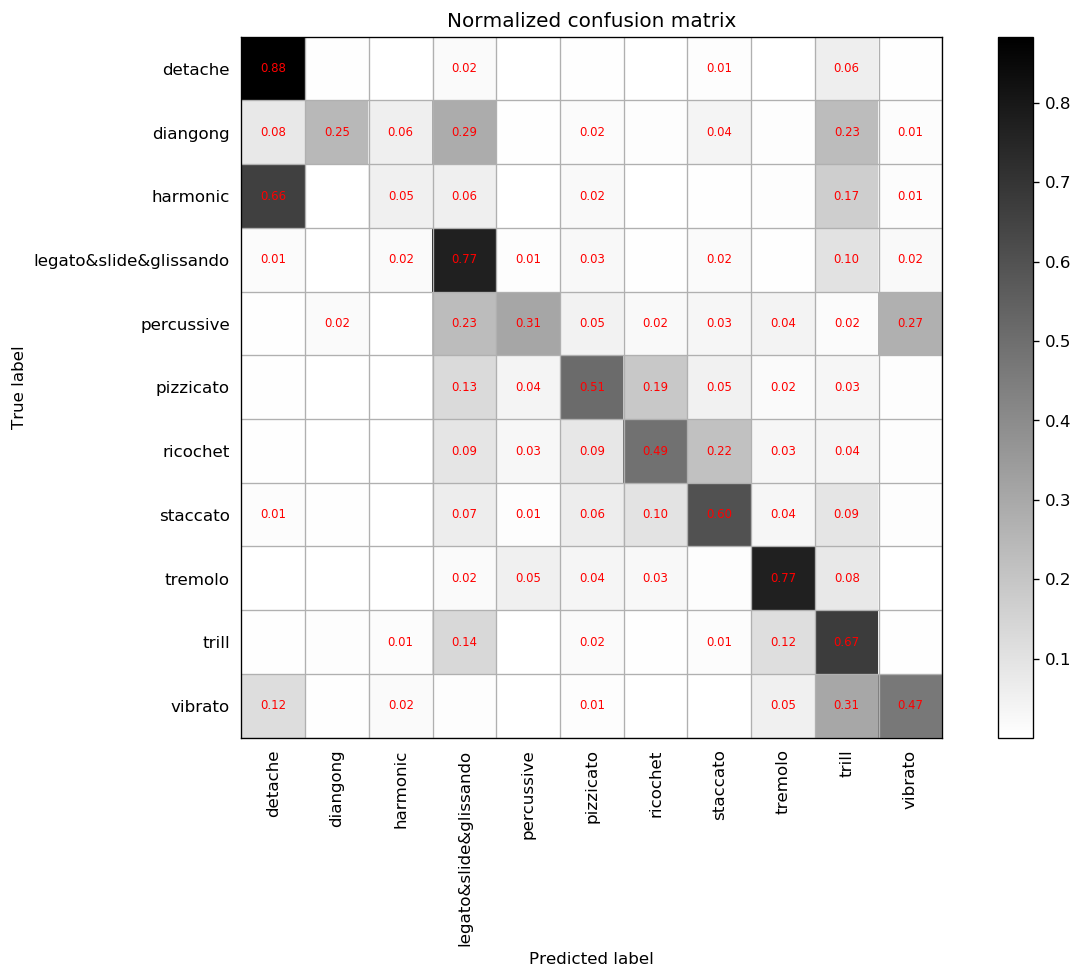

In [4]:
y_true = np.loadtxt('./confusion_matrix/fcn_mel_plus_cqt_11class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/fcn_mel_plus_cqt_11class_pred_label.txt')
compute_cm(y_true, y_pred, 'fcn_mel_plus_cqt_11class')

[[4.14e-01 8.85e-03 7.97e-02 2.29e-01 3.54e-03 3.61e-03 1.36e-04 1.06e-03
  1.09e-01 1.15e-01 3.57e-02]
 [3.05e-02 1.02e-02 2.24e-01 2.55e-01 1.44e-02 8.33e-03 1.70e-04 1.78e-03
  3.09e-02 3.86e-01 3.93e-02]
 [1.72e-01 7.43e-03 2.68e-01 3.60e-02 2.13e-03 2.69e-03 0.00e+00 1.58e-03
  4.23e-02 4.47e-01 2.17e-02]
 [4.86e-02 1.42e-02 1.05e-01 4.29e-01 6.77e-03 1.34e-02 4.81e-04 2.75e-03
  5.15e-02 2.90e-01 3.92e-02]
 [1.43e-02 4.23e-03 5.03e-02 5.53e-02 2.95e-02 4.41e-03 9.39e-05 3.01e-03
  5.40e-02 7.50e-01 3.48e-02]
 [2.97e-02 1.67e-02 1.05e-01 1.78e-01 5.58e-03 6.51e-03 4.65e-04 8.83e-03
  7.81e-02 4.97e-01 7.48e-02]
 [1.91e-02 8.29e-03 6.01e-02 2.12e-01 4.91e-03 4.47e-03 3.27e-04 3.27e-03
  7.06e-02 5.81e-01 3.59e-02]
 [3.06e-02 1.57e-02 7.62e-02 2.09e-01 7.17e-03 2.56e-03 0.00e+00 4.10e-03
  7.94e-02 5.09e-01 6.63e-02]
 [1.25e-02 8.16e-03 3.36e-02 1.54e-01 1.25e-02 5.06e-03 2.34e-03 2.83e-03
  2.17e-01 5.08e-01 4.31e-02]
 [1.65e-02 9.24e-03 3.96e-02 1.42e-01 6.61e-03 2.64e-03 0.00e+00

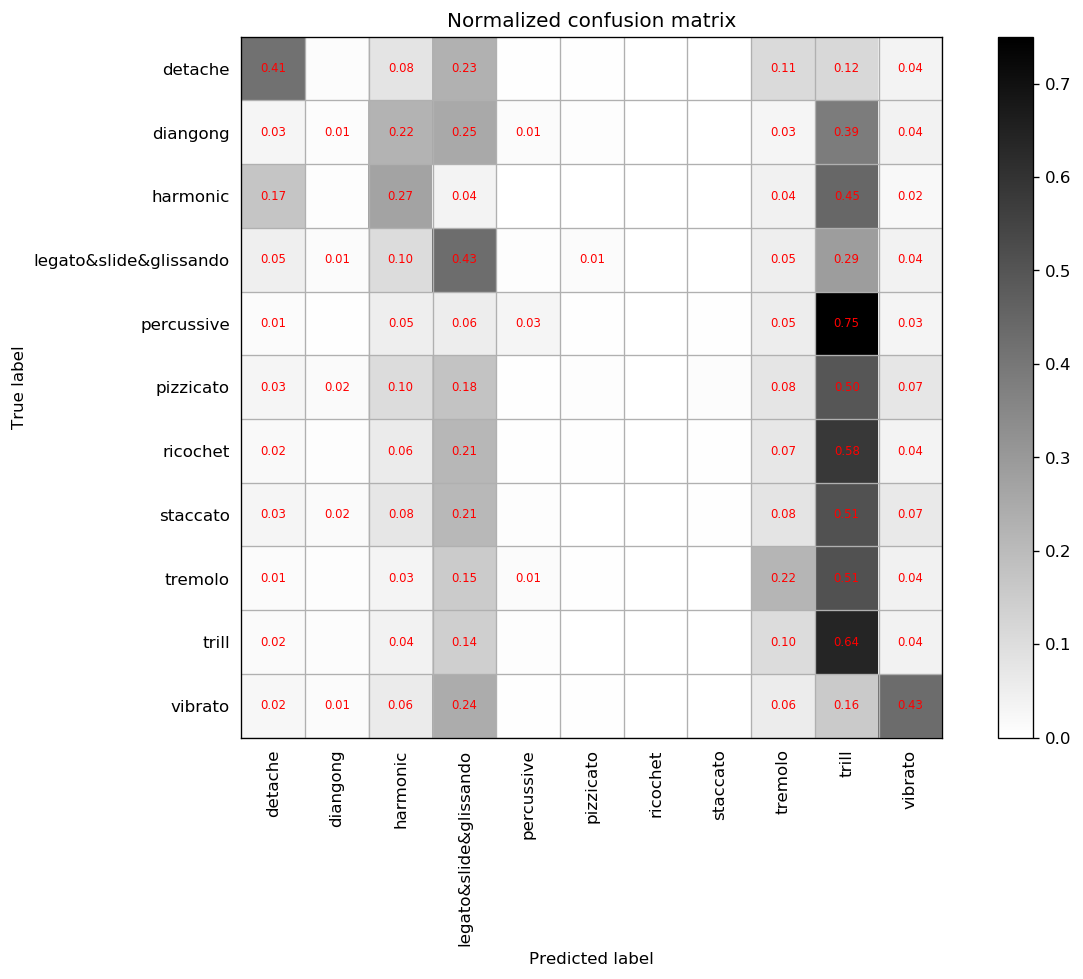

In [6]:
y_true = np.loadtxt('./confusion_matrix/cnn_mel_11class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/cnn_mel_11class_pred_label.txt')
compute_cm(y_true, y_pred, 'cnn_mel_11class')

In [19]:
import sklearn as sk
y_true = np.loadtxt('./confusion_matrix/zhudifcn_mel_4class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/zhudifcn_mel_4class_pred_label.txt')
def change_2class(y, i):
    mask0 = np.where(y != i)
    mask1 = np.where(y == i)
    y_true1 = y.copy()
    y_true1[mask1] = 1
    y_true1[mask0] = 0
    return y_true1

for i in range(4):
    new_true = change_2class(y_true, i)
    new_pred = change_2class(y_pred, i)
    print("===============data of technique", labels[i])
    print("Precision", sk.metrics.precision_score(new_true, new_pred))
    print( "Recall", sk.metrics.recall_score(new_true, new_pred))
    print( "f1_score", sk.metrics.f1_score(new_true, new_pred))

===============data of technique FT
Precision 0.9294340682488414
Recall 0.8506522717049033
f1_score 0.8882998355870215
===============data of technique Tremolo
Precision 0.9273333825737992
Recall 0.9058997546779547
f1_score 0.916491270758562
===============data of technique Trill
Precision 0.8763397959843862
Recall 0.9460560625814863
f1_score 0.9098644215805914
===============data of technique Vibrato
Precision 0.8510008238149311
Recall 0.8732236691798035
f1_score 0.8619690357791233


[[8.81e-01 7.70e-03 7.11e-03 2.03e-02 2.06e-02 1.50e-02 1.45e-03]
 [6.65e-03 9.52e-01 1.15e-02 2.89e-02 1.61e-02 3.42e-02 2.73e-02]
 [7.43e-04 1.99e-03 9.06e-01 2.97e-04 4.16e-03 9.81e-03 1.81e-03]
 [7.34e-02 4.17e-02 1.40e-02 9.21e-01 8.06e-03 5.06e-02 2.15e-03]
 [1.18e-02 2.94e-02 1.82e-02 4.55e-03 7.33e-01 2.85e-02 1.84e-02]
 [4.49e-03 1.98e-02 5.42e-02 4.71e-03 1.80e-02 8.39e-01 2.75e-02]
 [1.49e-03 1.55e-02 5.35e-03 1.08e-03 1.79e-02 3.30e-02 8.62e-01]]
FT
& 88.1
& 0.8
& 0.7
& 2.0
& 2.1
& 1.5
& 0.1
Tremolo
& 0.7
& 95.2
& 1.2
& 2.9
& 1.6
& 3.4
& 2.7
Trill
& 0.1
& 0.2
& 90.6
& 0.0
& 0.4
& 1.0
& 0.2
Vibrato
& 7.3
& 4.2
& 1.4
& 92.1
& 0.8
& 5.1
& 0.2
Acciacatura
& 1.2
& 2.9
& 1.8
& 0.5
& 73.3
& 2.9
& 1.8
Portamento
& 0.4
& 2.0
& 5.4
& 0.5
& 1.8
& 83.9
& 2.7
Glissando
& 0.1
& 1.6
& 0.5
& 0.1
& 1.8
& 3.3
& 86.2


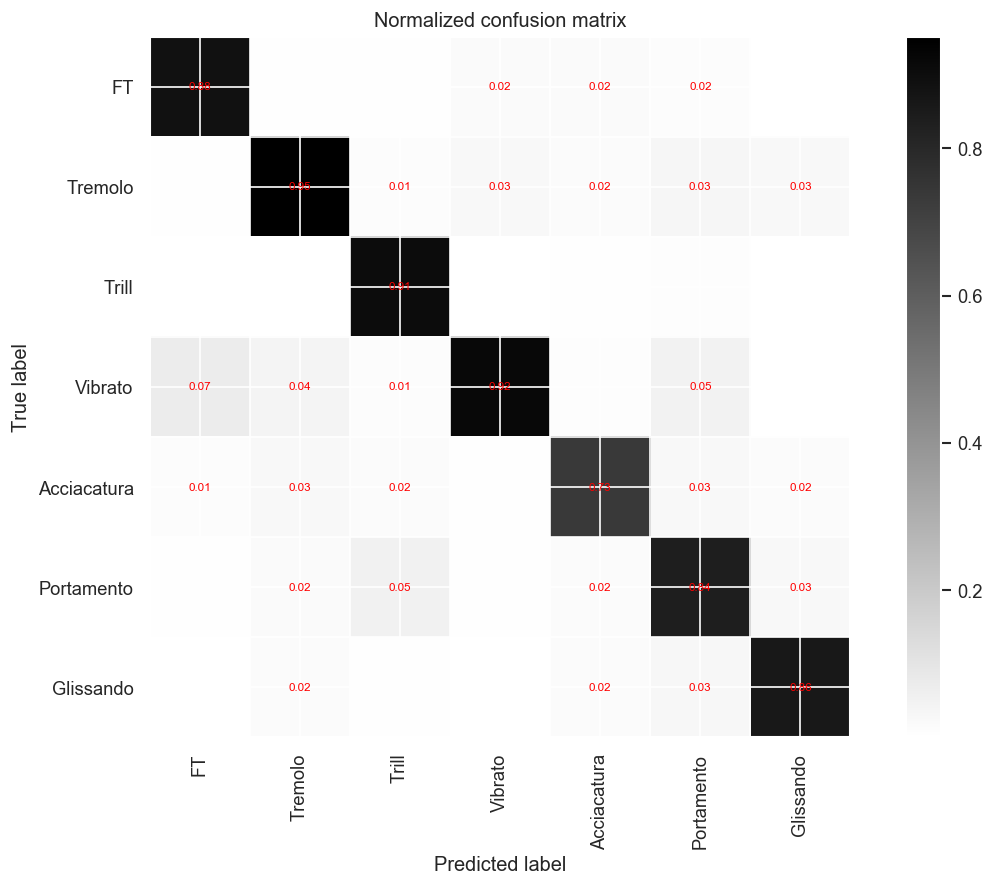

In [29]:
y_true = np.loadtxt('./confusion_matrix/zhudifcn_mel_7class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/zhudifcn_mel_7class_pred_label.txt')
compute_cm(y_true, y_pred, 'zhudi_mel_7class')


C:\Users\17000\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[[0.57 0.04 0.11 0.14 0.05 0.07 0.  ]
 [ nan  nan  nan  nan  nan  nan  nan]
 [0.02 0.01 0.82 0.06 0.01 0.07 0.01]
 [0.1  0.25 0.04 0.35 0.13 0.1  0.03]
 [ nan  nan  nan  nan  nan  nan  nan]
 [0.02 0.01 0.27 0.01 0.01 0.46 0.22]
 [0.   0.01 0.01 0.   0.07 0.2  0.71]]


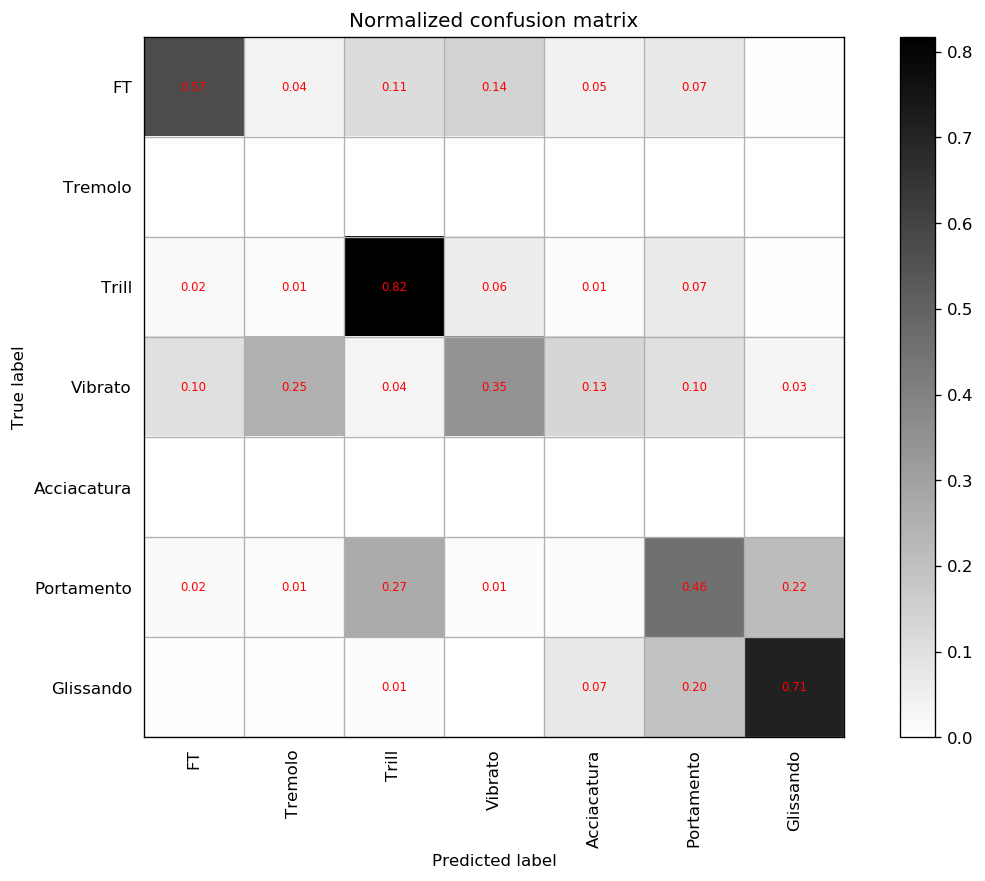

In [8]:
y_true = np.loadtxt('./confusion_matrix/iso_zhudifcn_mel_7class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/iso_zhudifcn_mel_7class_pred_label.txt')
compute_cm(y_true, y_pred, 'iso_zhudi_mel_7class')

In [21]:
import sklearn as sk
y_true = np.loadtxt('./confusion_matrix/zhudifcn_mel_7class_real_label.txt')
y_pred = np.loadtxt('./confusion_matrix/zhudifcn_mel_7class_pred_label.txt')
def change_2class(y, i):
    mask0 = np.where(y != i)
    mask1 = np.where(y == i)
    y_true1 = y.copy()
    y_true1[mask1] = 1
    y_true1[mask0] = 0
    return y_true1

for i in range(7):
    new_true = change_2class(y_true, i)
    new_pred = change_2class(y_pred, i)
    print("===============data of technique", labels[i])
    print("Precision", sk.metrics.precision_score(new_true, new_pred))
    print( "Recall", sk.metrics.recall_score(new_true, new_pred))
    print( "f1_score", sk.metrics.f1_score(new_true, new_pred))

===============data of technique FT
Precision 0.8813790168120876
Recall 0.92429923227995
f1_score 0.9023290267761825
===============data of technique Tremolo
Precision 0.9518365714908853
Recall 0.8842419842301653
f1_score 0.9167950423639801
===============data of technique Trill
Precision 0.9061115241635688
Recall 0.9796469566894955
f1_score 0.9414454778605197
===============data of technique Vibrato
Precision 0.9205599360866997
Recall 0.8289905846288592
f1_score 0.872378945982422
===============data of technique Acciacatura
Precision 0.7327603640040445
Recall 0.8685282837967402
f1_score 0.7948886695184819
===============data of technique Portamento
Precision 0.8393002308717848
Recall 0.8670720236495566
f1_score 0.852960129541812
===============data of technique Glissando
Precision 0.8617902918618418
Recall 0.9205476439214824
f1_score 0.890200457276546
